python3 version: 3.7.0

print( numpy.version.version ): 1.15.1

print( matplotlib.__version__ ): 2.2.3

In [10]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
class data():
    def __init__(self, X, Y):
        self.X, self.Y = X, Y

def load_data( filename ):
    data = np.loadtxt( filename )
    X, Y = data[:,:-1], data[:,-1,np.newaxis]
    return data( X, Y )

data_train = load_data( "hw3_train.dat.txt" )
data_test  = load_data( "hw3_test.dat.txt"  )

In [106]:
def sigmoid( z ):
    return 1/( 1 + np.exp(-1*z) )

def mistake( X, Y, w ):
    yhat = X.dot(w)
    yhat[yhat > 0]  = 1; yhat[yhat <= 0] = -1
    return np.sum(yhat != Y)/len(Y)

def logistic_regression( X, Y, eta = 0.01, numiter = 2000, stochastic = False ):
    N, d = X.shape; w = np.zeros(( d, 1 ))

    num = 0; Eins, Eouts = [], []
    for i in range(numiter):
        if stochastic == False:
            err = (-1*X*Y).T.dot( sigmoid( -X.dot(w) * Y ) )/N
        else:
            if num >= N:
                num = 0
            err = -Y[num, 0] * X[num: num+1, :].T * sigmoid(-1 * X[num, :].dot(w) * Y[num, 0] )
            num += 1
        w -= eta*err

        Eins.append(mistake( data_train.X, data_train.Y, w ))
        Eouts.append(mistake( data_test.X, data_test.Y, w ))

    return w, Eins, Eouts

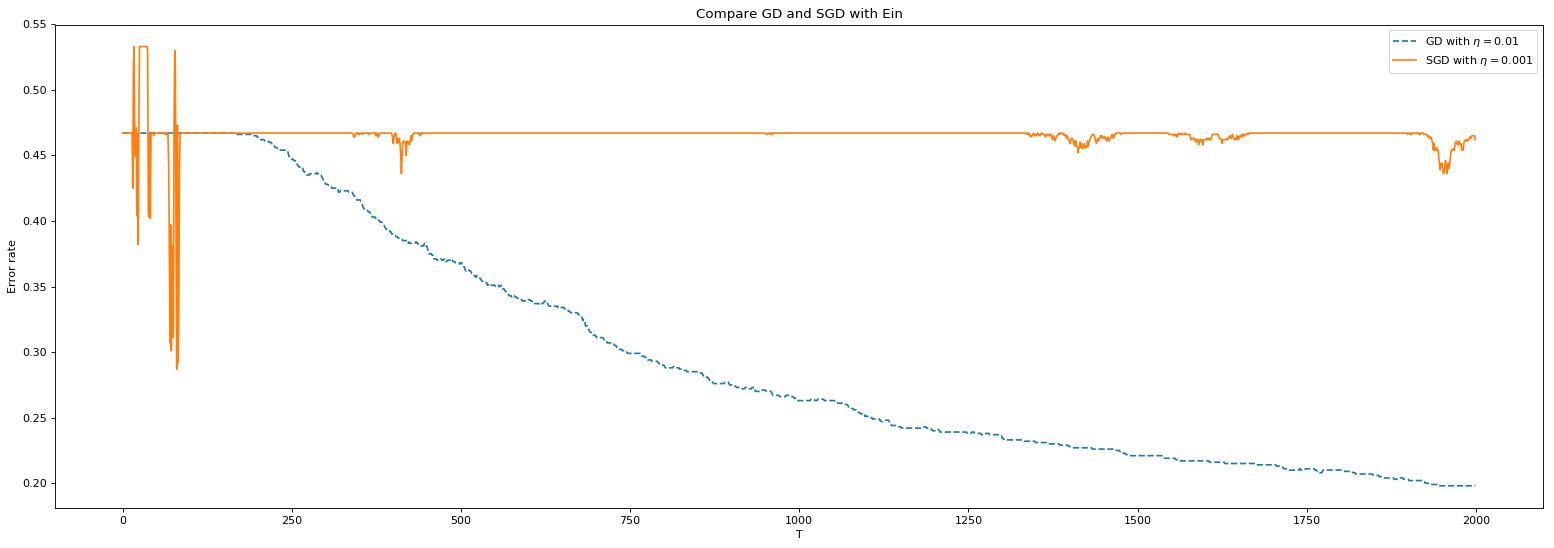

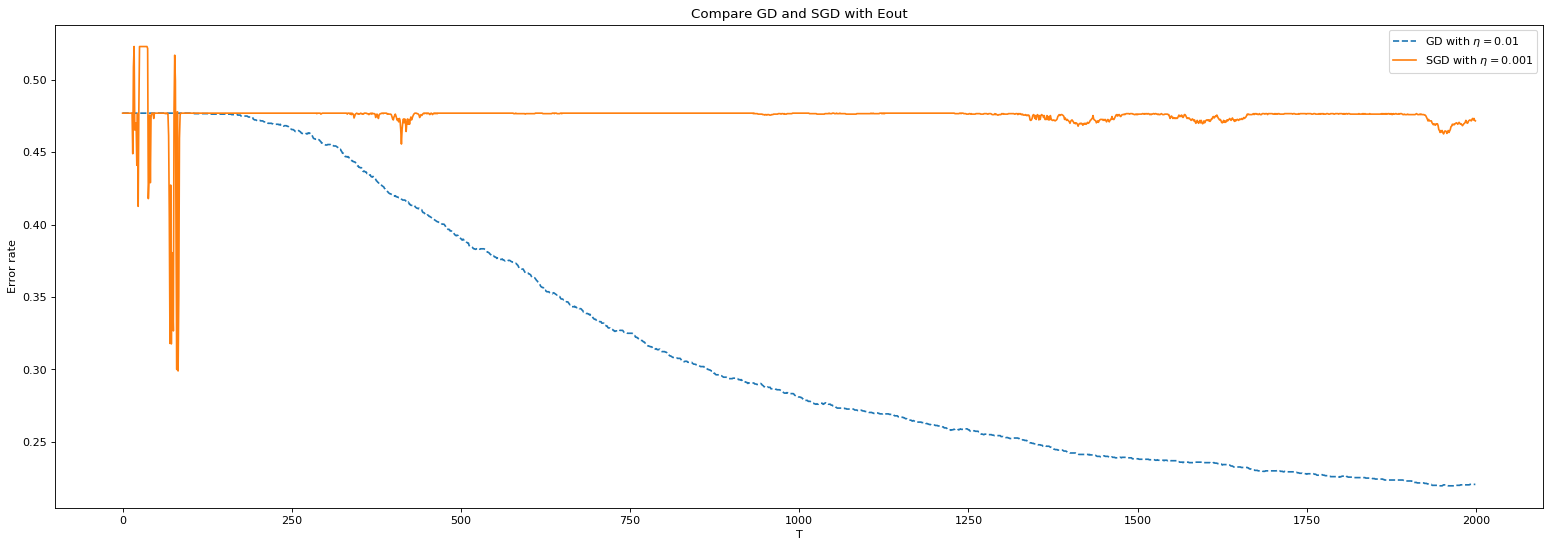

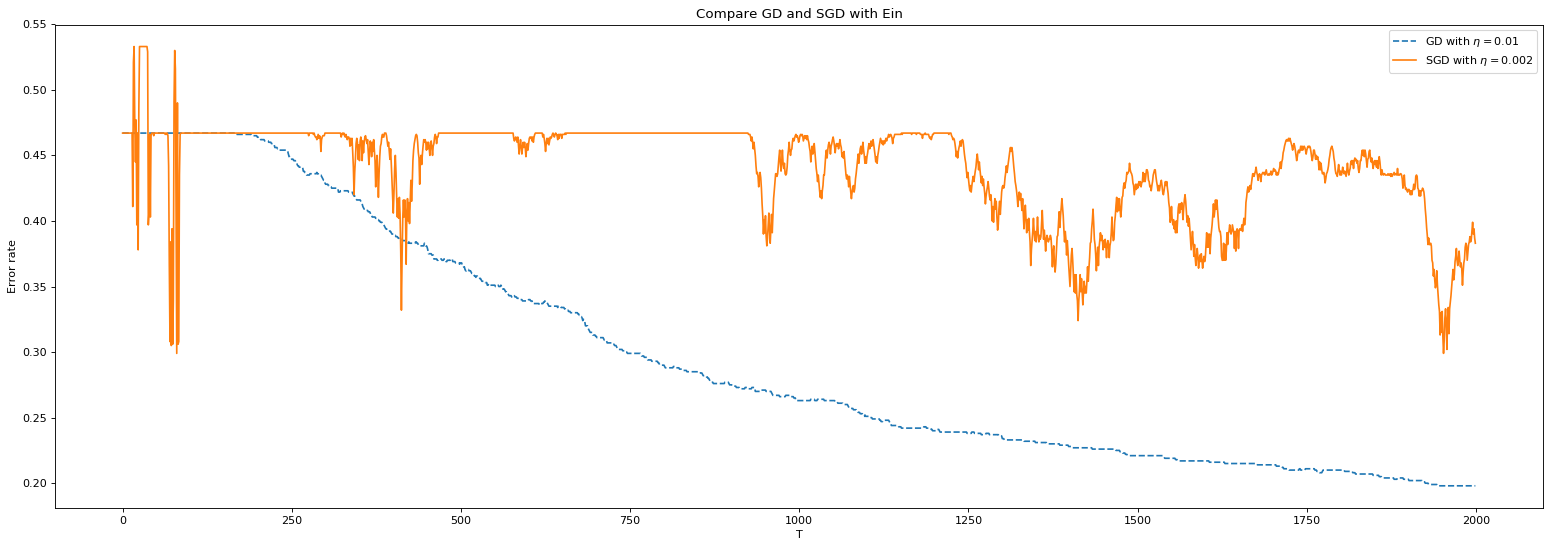

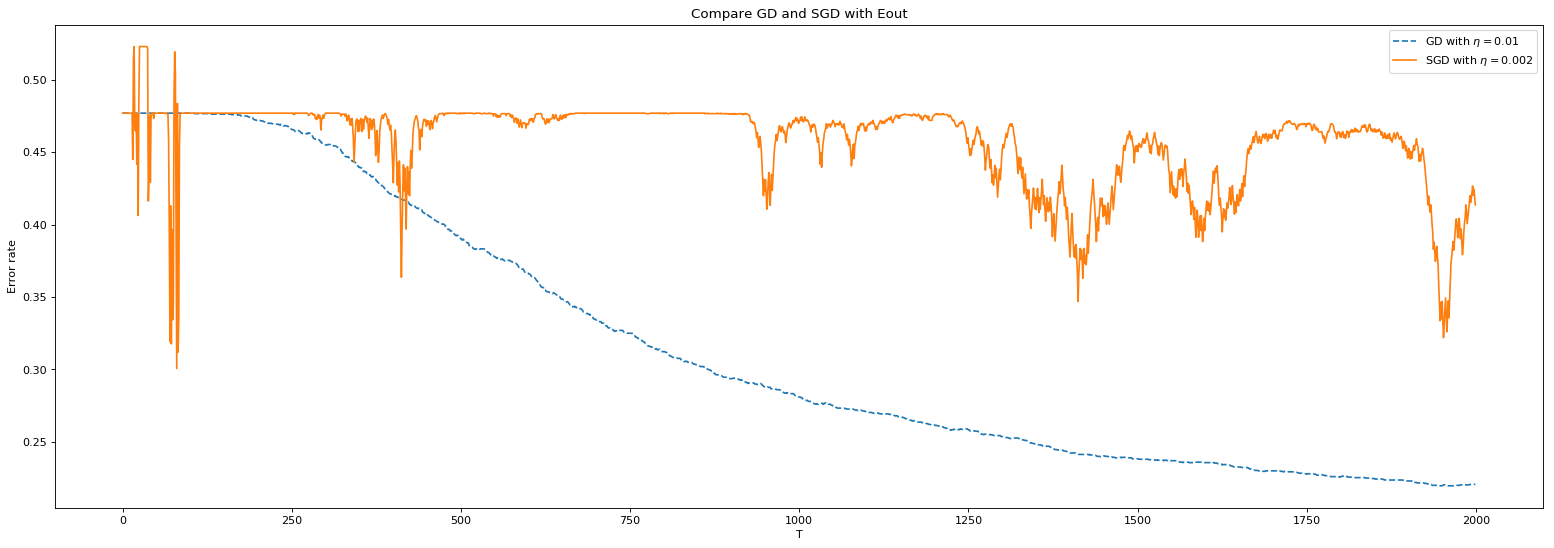

In [112]:
class draw_data():
    def __init__(self, data, label):
        self.data, self.label = data, label

def draw_linechart(data1, data2, title):
    plt.figure( num=None, figsize=(24, 8), dpi=80, facecolor='w', edgecolor='k' )
    plt.plot( data1.data, "--", label=data1.label )
    plt.plot( data2.data, "-", label=data2.label )
    plt.legend()
    plt.xlabel("T"); plt.ylabel("Error rate")
    plt.title(title)
    plt.show()

# Q19-20
w, Q19Eins, Q19Eouts = logistic_regression( data_train.X, data_train.Y, eta = 0.01 )
w, Q20Eins, Q20Eouts = logistic_regression( data_train.X, data_train.Y, eta = 0.001, stochastic = True )

draw_linechart( draw_data(Q19Eins,  "GD with $\eta = 0.01$"), draw_data(Q20Eins,  "SGD with $\eta = 0.001$"), "Compare GD and SGD with Ein" )
draw_linechart( draw_data(Q19Eouts, "GD with $\eta = 0.01$"), draw_data(Q20Eouts, "SGD with $\eta = 0.001$"), "Compare GD and SGD with Eout")

# Q19-20
w, Q19Eins, Q19Eouts = logistic_regression( data_train.X, data_train.Y, eta = 0.01 )
w, Q20Eins, Q20Eouts = logistic_regression( data_train.X, data_train.Y, eta = 0.002, stochastic = True )

draw_linechart( draw_data(Q19Eins,  "GD with $\eta = 0.01$"), draw_data(Q20Eins,  "SGD with $\eta = 0.002$"), "Compare GD and SGD with Ein" )
draw_linechart( draw_data(Q19Eouts, "GD with $\eta = 0.01$"), draw_data(Q20Eouts, "SGD with $\eta = 0.002$"), "Compare GD and SGD with Eout")